# problem 3 report

In [1]:
import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

# MLP

Reading data

In [2]:
num_workers = 0
batch_size = 20
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
valloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)



Lets print some datapoints

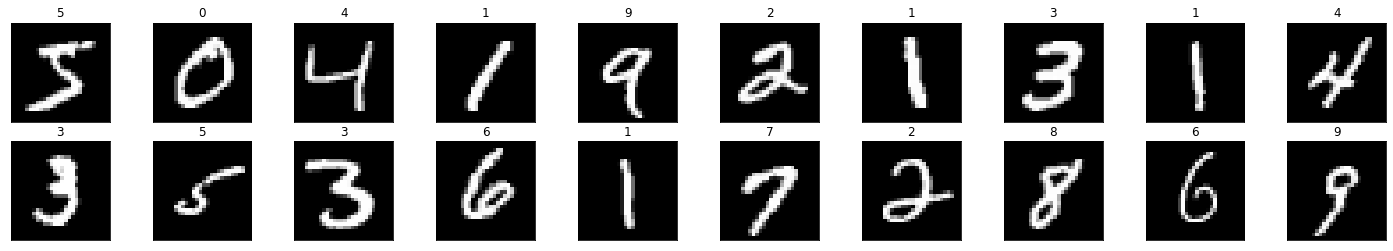

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.numpy()
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512,10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x=self.dropout(x)
        x = self.fc3(x)
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [6]:
n_epochs = 30
model.train() 
for epoch in range(n_epochs):
    train_loss = 0.0
    for data, target in trainloader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
    train_loss = train_loss/len(trainloader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.290384
Epoch: 2 	Training Loss: 0.113949
Epoch: 3 	Training Loss: 0.080264
Epoch: 4 	Training Loss: 0.061860
Epoch: 5 	Training Loss: 0.050205
Epoch: 6 	Training Loss: 0.041889
Epoch: 7 	Training Loss: 0.036585
Epoch: 8 	Training Loss: 0.032280
Epoch: 9 	Training Loss: 0.026641
Epoch: 10 	Training Loss: 0.025183
Epoch: 11 	Training Loss: 0.022887
Epoch: 12 	Training Loss: 0.020347
Epoch: 13 	Training Loss: 0.017849
Epoch: 14 	Training Loss: 0.017130
Epoch: 15 	Training Loss: 0.014304
Epoch: 16 	Training Loss: 0.014203
Epoch: 17 	Training Loss: 0.012948
Epoch: 18 	Training Loss: 0.013076
Epoch: 19 	Training Loss: 0.013314
Epoch: 20 	Training Loss: 0.010681
Epoch: 21 	Training Loss: 0.012524
Epoch: 22 	Training Loss: 0.010423
Epoch: 23 	Training Loss: 0.011183
Epoch: 24 	Training Loss: 0.008868
Epoch: 25 	Training Loss: 0.008370
Epoch: 26 	Training Loss: 0.007264
Epoch: 27 	Training Loss: 0.007514
Epoch: 28 	Training Loss: 0.006890
Epoch: 29 	Training Loss: 0.0

In [7]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in valloader:
    output = model(data)
    loss = criterion(output, target)    
    test_loss += loss.item()*data.size(0)
    _, pred = torch.max(output, 1)
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    for i in range(batch_size):
        
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

test_loss = test_loss/len(valloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.072477

Test Accuracy of     0: 99% (975/980)
Test Accuracy of     1: 99% (1131/1135)
Test Accuracy of     2: 97% (1007/1032)
Test Accuracy of     3: 97% (989/1010)
Test Accuracy of     4: 98% (963/982)
Test Accuracy of     5: 99% (885/892)
Test Accuracy of     6: 98% (948/958)
Test Accuracy of     7: 98% (1008/1028)
Test Accuracy of     8: 98% (955/974)
Test Accuracy of     9: 98% (989/1009)

Test Accuracy (Overall): 98% (9850/10000)


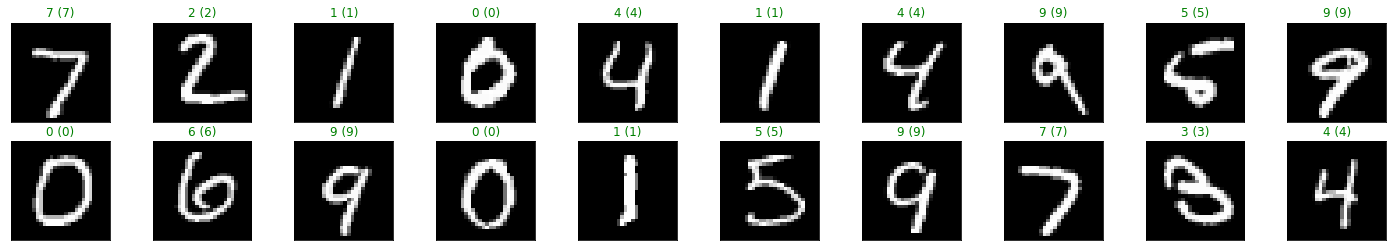

In [8]:
dataiter = iter(valloader)
images, labels = dataiter.next()

output = model(images)
_, preds = torch.max(output, 1)
images = images.numpy()

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

In [9]:
!pip install python-mnist

# CNN

In [1]:
from mnist import MNIST
from torch.utils.data import DataLoader, Dataset, TensorDataset
mnist = MNIST()
X_train,y_train = mnist.load_training()
X_test, y_test = mnist.load_testing()

In [8]:
len(X_train)

60000

In [23]:
from mnist import MNIST
from torch.utils.data import DataLoader, Dataset, TensorDataset
mnist = MNIST()
X_train,y_train = mnist.load_training()
X_test, y_test = mnist.load_testing()
X_train = torch.FloatTensor(X_train)
X_train = X_train.to(dtype=torch.float32)
X_train = X_train.reshape(X_train.size(0), -1) 
X_train = X_train/128
y_train = torch.FloatTensor(y_train)
y_train = y_train.to(dtype=torch.long)
bs = 4
X_test = torch.FloatTensor(X_test)
X_test = X_test.to(dtype=torch.float32)
X_test = X_test.reshape(X_test.size(0), -1) 
X_test = X_test/128
y_test = torch.FloatTensor(y_test)
y_test = y_test.to(dtype=torch.long)
train_ds = TensorDataset(X_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs, drop_last=False, shuffle=True)

test_ds = TensorDataset(X_test, y_test)
test_dl = DataLoader(test_ds, batch_size=bs * 2)

loaders={}
loaders['train'] = train_dl
loaders['test'] = test_dl

In [11]:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 24, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(24, 48, 5)
        self.fc1 = nn.Linear(48 * 4 * 4, 64)
        self.fc2 = nn.Linear(64, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 48 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [12]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [13]:
import torch
for epoch in range(10):
    running_loss = 0.0
    for i, (data,target) in enumerate(loaders['train']):
        optimizer.zero_grad()
        data = data.view(-1, 1, 28, 28)
        outputs = net(data)
        
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.831
[1,  4000] loss: 0.188
[1,  6000] loss: 0.136
[1,  8000] loss: 0.110
[1, 10000] loss: 0.091
[1, 12000] loss: 0.080
[1, 14000] loss: 0.072
[2,  2000] loss: 0.057
[2,  4000] loss: 0.057
[2,  6000] loss: 0.047
[2,  8000] loss: 0.051
[2, 10000] loss: 0.055
[2, 12000] loss: 0.055
[2, 14000] loss: 0.040
[3,  2000] loss: 0.033
[3,  4000] loss: 0.033
[3,  6000] loss: 0.033
[3,  8000] loss: 0.043
[3, 10000] loss: 0.037
[3, 12000] loss: 0.039
[3, 14000] loss: 0.032
[4,  2000] loss: 0.028
[4,  4000] loss: 0.026
[4,  6000] loss: 0.022
[4,  8000] loss: 0.030
[4, 10000] loss: 0.028
[4, 12000] loss: 0.030
[4, 14000] loss: 0.028
[5,  2000] loss: 0.023
[5,  4000] loss: 0.017
[5,  6000] loss: 0.016
[5,  8000] loss: 0.020
[5, 10000] loss: 0.026
[5, 12000] loss: 0.027
[5, 14000] loss: 0.020
[6,  2000] loss: 0.016
[6,  4000] loss: 0.013
[6,  6000] loss: 0.015
[6,  8000] loss: 0.016
[6, 10000] loss: 0.020
[6, 12000] loss: 0.020
[6, 14000] loss: 0.019
[7,  2000] loss: 0.010
[7,  4000] 

In [14]:
PATH = './mnist_net.pth'
torch.save(net.state_dict(), PATH)

In [15]:
dataiter = iter(loaders['test'])
images, labels = dataiter.next()

In [16]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [17]:
images = images.view(-1, 1, 28, 28)
outputs = net(images)

In [18]:
correct = 0
total = 0
with torch.no_grad():
    for data in loaders['test']:
        images, labels = data
        images = images.view(-1,1,28,28)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: {} %'.format(
    100 * correct / total))

Accuracy of the network on the 10000 test images: 99.21 %


# SVM

In [19]:
from mnist import MNIST
import numpy as np
mnist = MNIST()
X_train,y_train = mnist.load_training()
X_test, y_test = mnist.load_testing()

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [21]:
from sklearn.svm import SVC
svm  = SVC(C=10)
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(np.array(y_test), np.array(predictions))

0.9614

In [24]:
!jupyter nbconvert --to html q3.ipynb

[NbConvertApp] Converting notebook q3.ipynb to html
[NbConvertApp] Writing 383718 bytes to q3.html
